# Annotate Peaks

Annotate peak features such as GC content, gene features, distances from nearest genes, etc.

In [1]:
library(annotatr)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:annotatr’:

    plot_annotation




In [2]:
BED_DIR = "./beds/20200409_heatmap_peakwidthnorm_qn_batch1_D0_CC_D2_16hr_sorted_n15/"

In [7]:
bed_names = sub(".bed", "", list.files(sprintf("./%s/", BED_DIR), pattern="idx[0-9]*.bed"))
bed_names

[1] "idx1"  "idx10" "idx11" "idx12" "idx13" "idx14" "idx15" "idx2"  "idx3" 
[10] "idx4"  "idx5"  "idx6"  "idx7"  "idx8"  "idx9"

In [13]:
bed_names = bed_names[order(nchar(bed_names), bed_names)]
bed_names

[1] "idx1"  "idx2"  "idx3"  "idx4"  "idx5"  "idx6"  "idx7"  "idx8"  "idx9" 
[10] "idx10" "idx11" "idx12" "idx13" "idx14" "idx15"

In [14]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

## Genes

In [15]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_basicgenes', 
                                                                 'hg38_genes_intergenic',
                                                                 'hg38_genes_intronexonboundaries'))

Loading required package: GenomicFeatures

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min


Loading requir

In [16]:
annotated = list()

for (i in bed_names) {
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [18]:
# specific to type of annotation, this one for gene level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = bed_names[1]

for (i in bed_names[2:length(bed_names)]) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("%s", i)] = cur_df[rownames(annotated_df), "n"]
}

# colnames(annotated_df) = sub("_", "-", lapply(strsplit(sub("_", ":", colnames(annotated_df)), ":"), "[[", 2))

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [19]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 3)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15
1to5kb,10.967984,10.082003,8.9899941,14.446421,13.329928,12.943606,8.783377,12.134283,8.3663708,10.528698,7.7374200,9.2718854,10.851087,5.2795031,6.734989
3UTRs,2.105346,2.060538,2.6554981,1.898778,2.346396,2.674383,1.851081,1.155520,1.9736275,2.348415,1.5175189,1.6935866,1.801665,0.8413726,1.041814
5UTRs,2.045985,1.530885,0.5830384,8.450948,3.658956,3.026208,1.198575,12.734468,0.8489184,1.434465,0.4901436,0.6508185,1.096572,0.6585613,0.852136
exons,8.470854,8.007527,6.3752323,14.864521,10.983532,11.390985,7.279374,16.335576,6.2871671,7.821667,4.8115408,5.5456302,6.469125,4.1782300,4.829714
intergenic,19.941430,22.986503,22.6977620,7.175856,14.049504,16.525597,26.766625,5.685266,25.6205292,21.118326,28.0066779,24.4485361,21.862226,41.6545527,34.040144
intronexonboundaries,6.905695,6.681070,5.5019477,11.034626,8.611595,9.231593,6.009070,11.953568,5.4899595,6.500357,4.3791871,4.9330951,5.510977,3.5328840,4.096481
introns,43.003285,42.992543,49.5098913,27.599270,37.070392,35.414542,43.588320,23.755441,47.6773248,44.961092,50.1637379,49.9252561,47.836055,40.9122946,45.086771
promoters,6.559421,5.658931,3.6866359,14.529579,9.949696,8.793086,4.523578,16.245878,3.7361027,5.286980,2.8937737,3.5311919,4.572294,2.9426016,3.317951


In [20]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,1to5kb,idx1,10.967984
2,3UTRs,idx1,2.105346
3,5UTRs,idx1,2.045985
4,exons,idx1,8.470854
5,intergenic,idx1,19.941430
6,intronexonboundaries,idx1,6.905695


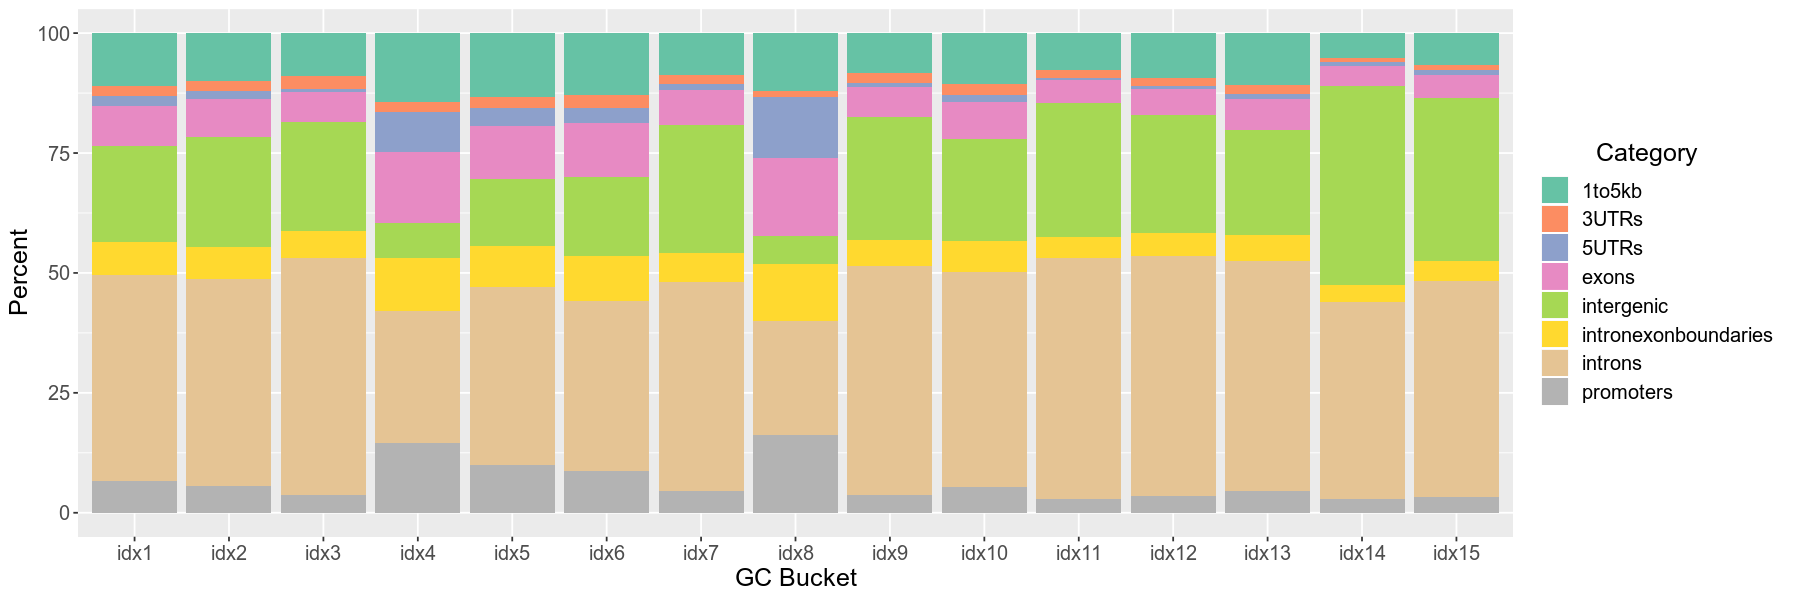

In [21]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## CpG

In [22]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_cpgs'))

Building CpG islands...

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [26]:
annotated = list()

for (i in bed_names) {
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [27]:
annotated[[1]]

annot.type,n
<chr>,<int>
hg38_cpg_inter,29380
hg38_cpg_islands,1980
hg38_cpg_shelves,1105
hg38_cpg_shores,3194


In [28]:
# specific to type of annotation, this one for CpG level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = bed_names[1]

for (i in bed_names[2:length(bed_names)]) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("%s", i)] = cur_df[rownames(annotated_df), "n"]
}

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [29]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 3)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15
inter,82.391542,85.238775,95.3829131,38.267140,66.407313,65.613921,88.857212,35.978519,93.294372,86.688868,97.5419112,95.1383224,91.2507272,94.884371,95.6241956
islands,5.552595,5.048390,0.5364807,25.225765,10.112991,11.532662,3.272474,31.213757,1.617549,3.547383,0.2447562,0.1631435,0.2501454,1.506989,1.4935989
shelves,3.098797,2.354434,1.9078594,4.503778,4.537788,5.236562,2.113915,3.082241,1.733880,2.900649,1.2000947,2.5194024,4.1448517,1.161372,0.9449299
shores,8.957066,7.358401,2.1727468,32.003317,18.941908,17.616855,5.756399,29.725483,3.354199,6.863100,1.0132379,2.1791316,4.3542757,2.447268,1.9372756


In [30]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,inter,idx1,82.391542
2,islands,idx1,5.552595
3,shelves,idx1,3.098797
4,shores,idx1,8.957066
5,inter,idx2,85.238775
6,islands,idx2,5.048390


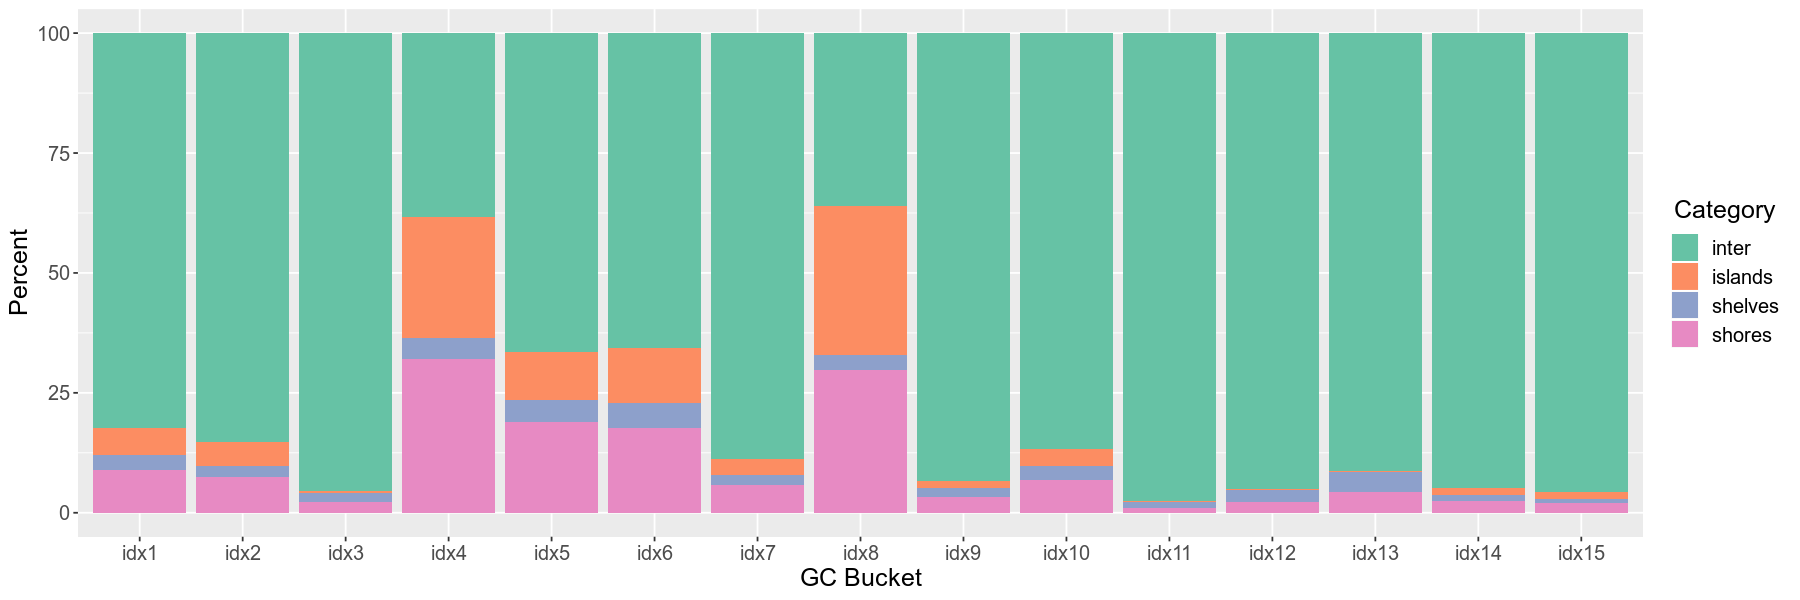

In [31]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## Distance From Nearest Gene

In [32]:
library(EnsDb.Hsapiens.v86)

Loading required package: ensembldb

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter




In [33]:
edb <- EnsDb.Hsapiens.v86

In [34]:
genes.hg38 = genes(edb, column = "gene_name", filter = GeneBiotypeFilter("protein_coding"))

In [35]:
tss.hg38 = resize(genes.hg38, width=1, fix='start')
head(tss.hg38, 2)

GRanges object with 2 ranges and 3 metadata columns:
                  seqnames    ranges strand |   gene_name         gene_id
                     <Rle> <IRanges>  <Rle> | <character>     <character>
  ENSG00000186092        1     69091      + |       OR4F5 ENSG00000186092
  ENSG00000279928        1    182393      + |  FO538757.2 ENSG00000279928
                    gene_biotype
                     <character>
  ENSG00000186092 protein_coding
  ENSG00000279928 protein_coding
  -------
  seqinfo: 287 sequences from GRCh38 genome

In [36]:
plots = list()

for (i in bed_names) {
    # take mid of peaks
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks$chr = sub("chr", "", peaks$chr)
    peaks_mid = as.integer((peaks$start+peaks$end)/2)
    peaks$start = peaks_mid
    peaks$end = peaks_mid+1
    peaks = makeGRangesFromDataFrame(peaks)
    
    dists = data.frame(distanceToNearest(peaks, tss.hg38, ignore.strand=TRUE))$distance
    print(median(dists))
    plots[[i]] <- ggplot(data.frame(d=dists+1), aes(x=d)) + 
        geom_histogram(bins=50, col='black', alpha=0.5, fill='red') +
        scale_x_log10() +
        coord_cartesian(xlim=c(1,1e7)) +
        ggtitle(sprintf("%s", i)) +  
        xlab("Distance from Nearest TSS") + ylab("Count") + 
        geom_vline(xintercept = 1000, linetype="dashed") +
        theme(plot.title = element_text(hjust = 0.5))
}

[1] 43252
[1] 46348
[1] 60540
[1] 9817
[1] 29118.5
[1] 28652
[1] 58938
[1] 9017
[1] 62723.5
[1] 46315
[1] 79361
[1] 66452
[1] 58843
[1] 152970
[1] 88991.5


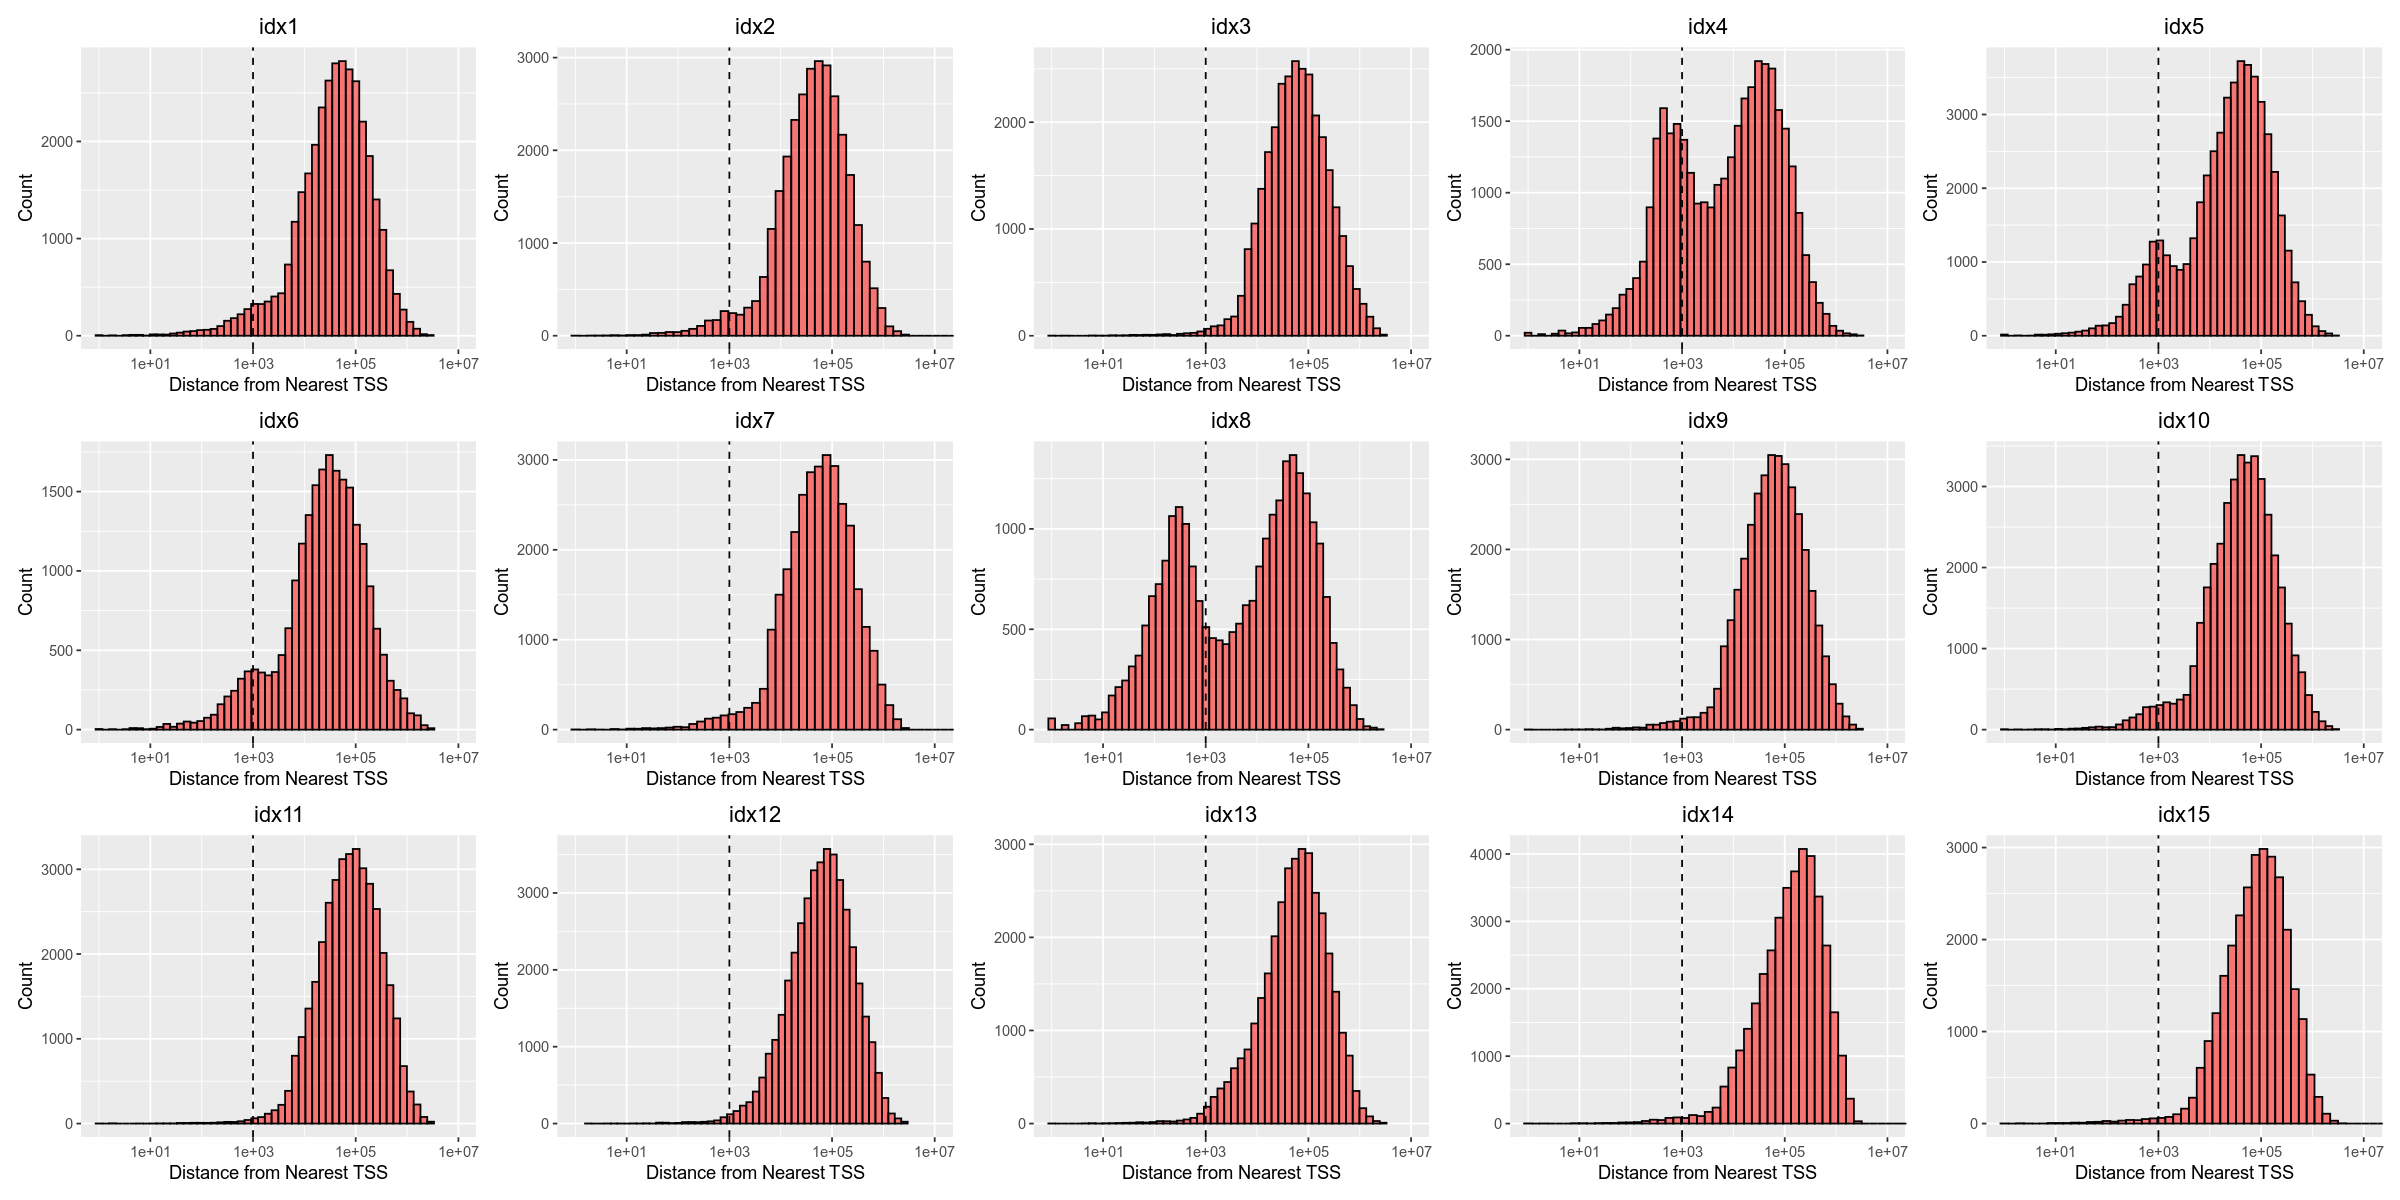

In [37]:
options(repr.plot.width = 20, repr.plot.height = 10)
wrap_plots(plots, ncol = 5)

## ChromHMM - Fibroblast

In [38]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/ChromHMM/E055_15_coreMarks_hg38lift_mnemonics.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type
annotations

GRanges object with 671383 ranges and 1 metadata column:
           seqnames            ranges strand |        type
              <Rle>         <IRanges>  <Rle> |    <factor>
       [1]     chr1       10000-10800      * |       9_Het
       [2]     chr1       10800-12600      * |    15_Quies
       [3]     chr1       12600-18400      * |      5_TxWk
       [4]     chr1       18400-88600      * |    15_Quies
       [5]     chr1       88600-90600      * | 14_ReprPCWk
       ...      ...               ...    ... .         ...
  [671379]     chrY 56887453-57217249      * |    15_Quies
  [671380]     chrM           0-12799      * |    15_Quies
  [671381]     chrM       12799-12999      * |       9_Het
  [671382]     chrM       12999-13199      * |  8_ZNF/Rpts
  [671383]     chrM       13199-16398      * |      5_TxWk
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [39]:
annotated = list()

for (i in bed_names) {
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [41]:
# specific to type of annotation, this one for CpG level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = bed_names[1]

for (i in bed_names[2:length(bed_names)]) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("%s", i)] = cur_df[rownames(annotated_df), "n"]
}

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."


In [42]:
# replace NA with 0
annotated_df[is.na(annotated_df)] = 0

In [43]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 2)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15
TssA,1.542777,0.7684501,0.14624531,23.34526458,8.4909837,3.9618086,0.4212545,32.8080531,0.3410037,1.9333264,0.29753335,0.93062942,2.57585225,0.20867904,0.21761019
TssBiv,1.407361,1.0845295,0.13352833,4.37070717,2.5455243,2.6375476,0.6362395,2.8275535,0.3436068,1.0387710,0.06238603,0.05952853,0.08331598,0.12068185,0.12342070
BivFlnk,3.820670,2.0443671,0.17803777,6.32291767,6.4914559,6.6578870,0.6623863,1.9210499,0.4607455,2.8822238,0.06718495,0.17660132,0.25226226,0.08799718,0.10393322
EnhBiv,4.816946,3.6392634,0.76301901,2.61197640,4.6453974,7.7955809,1.5136109,0.6245388,1.3718242,4.2679486,0.74143392,1.58147472,1.74269249,0.08799718,0.42547663
ReprPC,8.378875,13.2057416,6.01831246,1.66005611,3.9931529,11.7390986,13.2767787,0.2635185,9.0379009,7.1794336,2.36347058,2.05373442,0.97433405,2.46643536,4.50485563
ReprPCWk,11.053344,14.9224300,12.96178546,4.39198994,7.4772010,9.2186128,17.1494146,1.1858332,14.7464598,10.9248615,10.68000768,8.05421065,4.73975329,8.44521547,14.39799929
Quies,19.973884,24.6570973,39.75011127,4.16368385,10.7162884,15.0241440,33.1774208,2.3822072,35.0635152,20.2947016,41.08359727,24.96428288,14.06882825,49.39659074,48.73168989
TssAFlnk,3.288678,1.3716108,0.22890570,23.10534971,13.0921111,5.7323676,0.3776764,26.0777907,0.5102041,3.6346536,0.53987907,2.44066989,8.48665787,0.08296877,0.18188314
TxFlnk,1.184891,0.5596636,0.16850003,4.40553352,2.8199982,2.1949078,0.1655966,3.6233794,0.1613911,0.8255826,0.08638065,0.48416541,1.29371196,0.02011364,0.02598331
Tx,4.638004,6.3041902,8.33280346,0.79326691,2.1057758,4.7666081,5.6012318,0.1607463,5.3883798,4.1822552,3.77195508,2.85736963,1.30065496,1.28727309,3.14397999


In [44]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,TssA,idx1,1.542777
2,TssBiv,idx1,1.407361
3,BivFlnk,idx1,3.820670
4,EnhBiv,idx1,4.816946
5,ReprPC,idx1,8.378875
6,ReprPCWk,idx1,11.053344


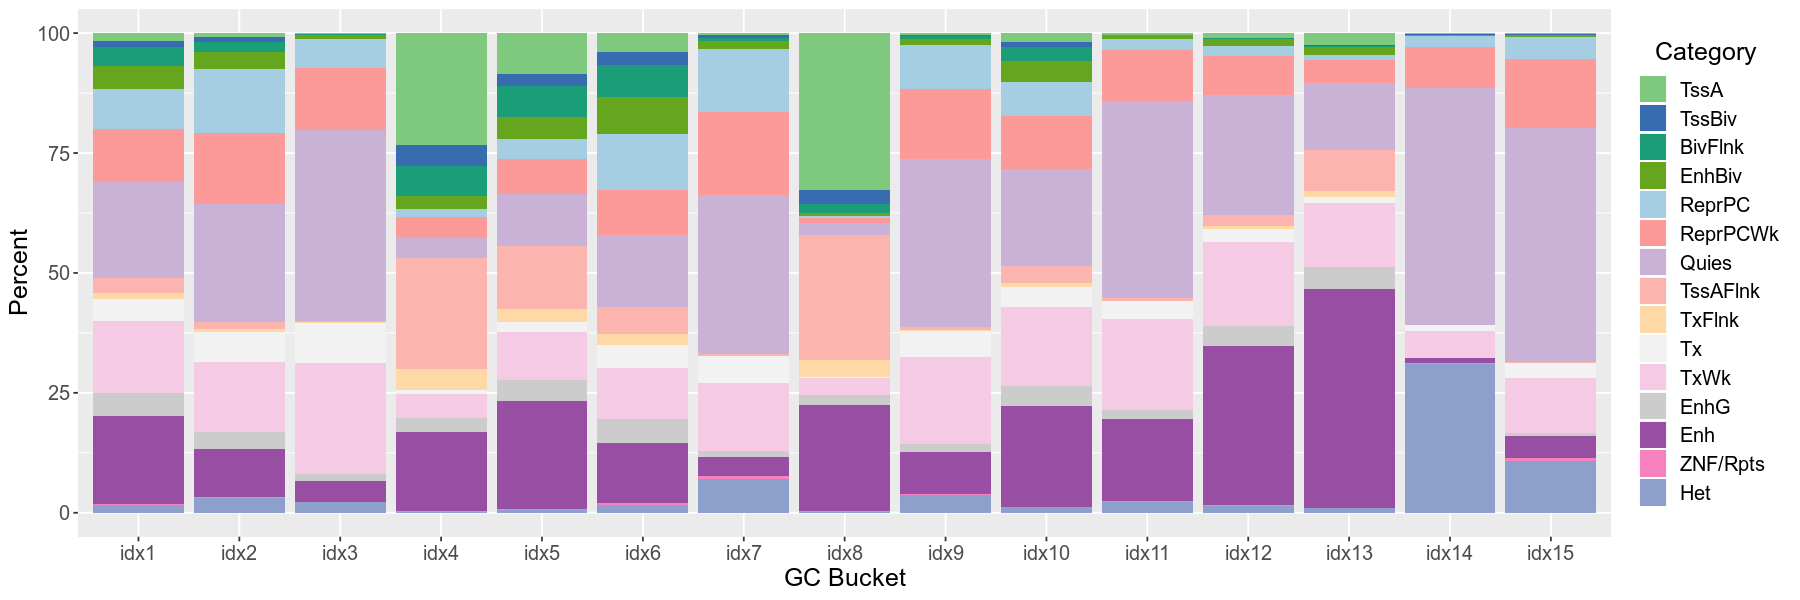

In [45]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## ChromHMM - ESC

In [46]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/ChromHMM/E003_15_coreMarks_hg38lift_mnemonics.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type

In [47]:
annotated = list()

for (i in bed_names) {
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [48]:
annotated[[1]]

annot.type,n
<fct>,<int>
1_TssA,1047
10_TssBiv,1185
11_BivFlnk,1140
12_EnhBiv,937
13_ReprPC,531
14_ReprPCWk,1304
15_Quies,15765
2_TssAFlnk,767
3_TxFlnk,29


In [49]:
# specific to type of annotation, this one for CpG level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = bed_names[1]

for (i in bed_names[2:length(bed_names)]) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("%s", i)] = cur_df[rownames(annotated_df), "n"]
}

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."


In [50]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 2)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15
TssA,2.63721317,1.69437433,0.57892102,23.5204092,8.5890554,5.0785320,1.51219784,33.4072170,0.75799015,1.70574733,0.15720480,0.35954560,1.18899122,1.64844133,0.80650223
TssBiv,2.98481147,2.39359387,0.29415446,8.3607623,5.3425206,4.9473237,1.69043110,4.7728818,0.90385767,2.11305639,0.10142245,0.11249586,0.19639587,0.67849565,0.43620159
BivFlnk,2.87146419,2.63440392,0.31605958,6.6961572,4.8008974,4.8662833,1.48713379,3.1858616,0.89083379,2.16256357,0.08113796,0.09926106,0.27336182,0.48497284,0.42992531
EnhBiv,2.36014206,2.54736415,0.70096383,2.8868530,2.8939989,3.8629259,2.36437563,1.4599403,1.36229846,1.83176561,0.31440959,0.39704423,0.71923353,1.49921891,0.95713299
ReprPC,1.33749780,1.37812981,0.74164476,1.8323235,1.9581764,2.3887624,1.30333073,0.9870851,0.87520513,1.41995589,0.52993230,0.78747105,1.04036731,0.87668167,0.77198268
ReprPCWk,3.28455203,3.25818899,2.43772687,3.1929391,3.8458457,4.4186316,3.04110505,2.3701865,2.80013545,3.62752599,2.03352012,2.75283997,3.32015181,2.31061578,2.15590284
Quies,39.70932722,40.17175849,53.18563024,17.2058114,32.6544347,33.3732104,40.74300991,20.3475485,52.76236618,48.62730096,69.79132331,63.35281791,56.13471695,49.38329175,56.47084667
TssAFlnk,1.93194126,1.54640671,0.46313681,7.7968092,4.0205112,2.4312121,1.24206305,7.5420398,0.68245162,1.16116837,0.05324679,0.23602073,0.73781151,0.89533447,0.59310864
TxFlnk,0.07304602,0.08413845,0.01564651,0.3123755,0.1698582,0.1003357,0.05012811,0.2541596,0.02604777,0.03825555,0.01014224,0.02426381,0.07165795,0.08860081,0.03138141
Tx,3.86640135,3.54251893,6.08649393,1.8952179,3.2513420,4.2604098,2.60109168,1.8323137,3.82902243,4.62892119,3.92758437,4.46013014,4.03938533,0.86735527,1.93623298


In [51]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,TssA,idx1,2.637213
2,TssBiv,idx1,2.984811
3,BivFlnk,idx1,2.871464
4,EnhBiv,idx1,2.360142
5,ReprPC,idx1,1.337498
6,ReprPCWk,idx1,3.284552


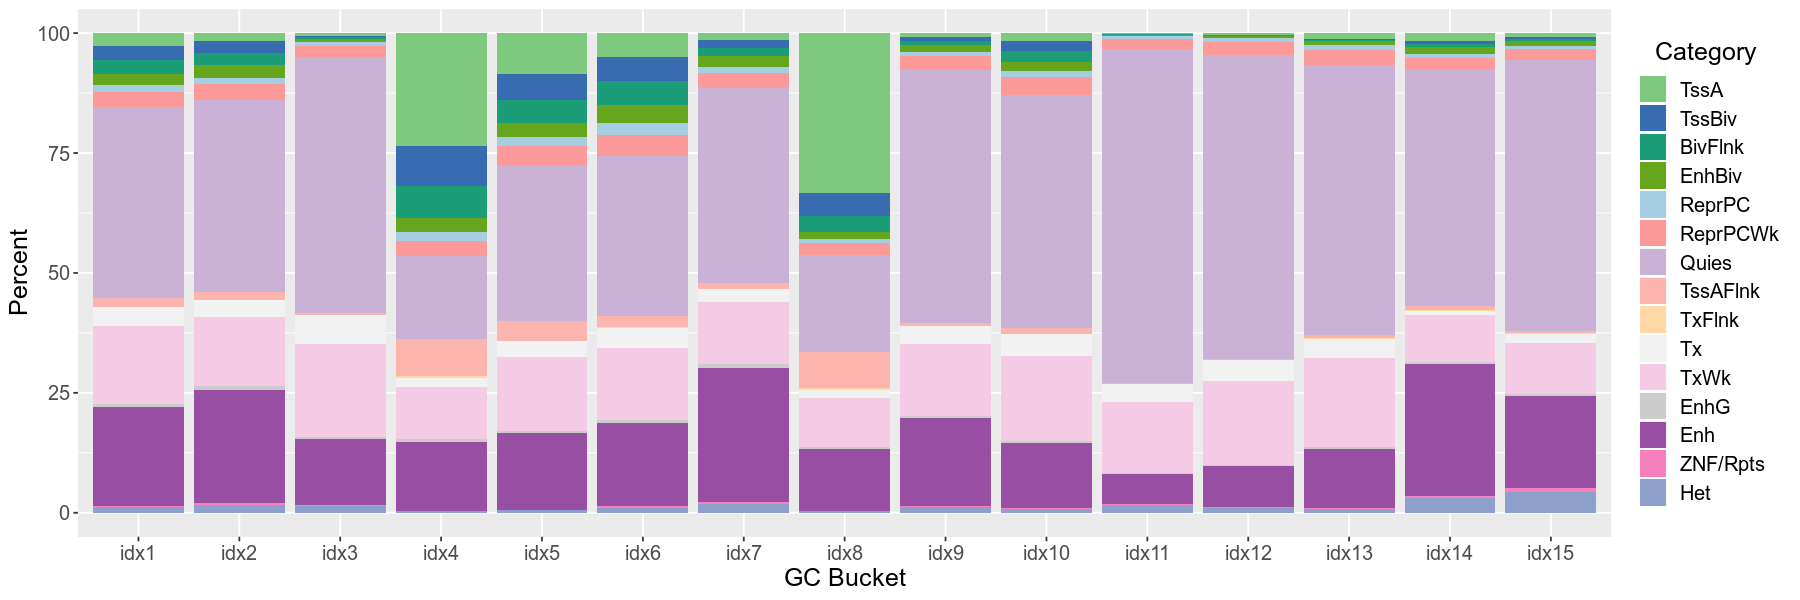

In [52]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))